In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x = np.linspace(0,30,20)

In [4]:
y = x + 3*np.random.randn(20)

In [5]:
x

array([  0.        ,   1.57894737,   3.15789474,   4.73684211,
         6.31578947,   7.89473684,   9.47368421,  11.05263158,
        12.63157895,  14.21052632,  15.78947368,  17.36842105,
        18.94736842,  20.52631579,  22.10526316,  23.68421053,
        25.26315789,  26.84210526,  28.42105263,  30.        ])

In [6]:
y

array([  0.31379265,   2.07964595,   1.97192528,   7.35978339,
         8.38288287,   5.82544881,   5.46888788,   7.23104088,
        13.0111985 ,  12.88658691,  16.60465543,  17.05059666,
        12.30469477,  15.82858092,  20.38050701,  27.68379224,
        27.21880373,  25.86490102,  27.12450144,  25.07514145])

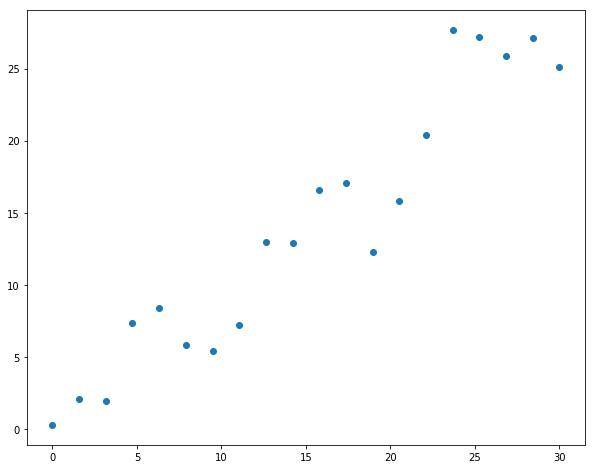

In [10]:
plt.figure(figsize=(10,8))
plt.scatter(x,y)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()

In [25]:
x

array([  0.        ,   1.57894737,   3.15789474,   4.73684211,
         6.31578947,   7.89473684,   9.47368421,  11.05263158,
        12.63157895,  14.21052632,  15.78947368,  17.36842105,
        18.94736842,  20.52631579,  22.10526316,  23.68421053,
        25.26315789,  26.84210526,  28.42105263,  30.        ])

In [26]:
y

array([  0.31379265,   2.07964595,   1.97192528,   7.35978339,
         8.38288287,   5.82544881,   5.46888788,   7.23104088,
        13.0111985 ,  12.88658691,  16.60465543,  17.05059666,
        12.30469477,  15.82858092,  20.38050701,  27.68379224,
        27.21880373,  25.86490102,  27.12450144,  25.07514145])

In [27]:
X = x.reshape(-1,1)

In [29]:
Y = y.reshape(-1,1)

In [31]:
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
model.predict([[40]])

array([[ 37.43358245]])

In [35]:
x

array([  0.        ,   1.57894737,   3.15789474,   4.73684211,
         6.31578947,   7.89473684,   9.47368421,  11.05263158,
        12.63157895,  14.21052632,  15.78947368,  17.36842105,
        18.94736842,  20.52631579,  22.10526316,  23.68421053,
        25.26315789,  26.84210526,  28.42105263,  30.        ])

In [36]:
y

array([  0.31379265,   2.07964595,   1.97192528,   7.35978339,
         8.38288287,   5.82544881,   5.46888788,   7.23104088,
        13.0111985 ,  12.88658691,  16.60465543,  17.05059666,
        12.30469477,  15.82858092,  20.38050701,  27.68379224,
        27.21880373,  25.86490102,  27.12450144,  25.07514145])

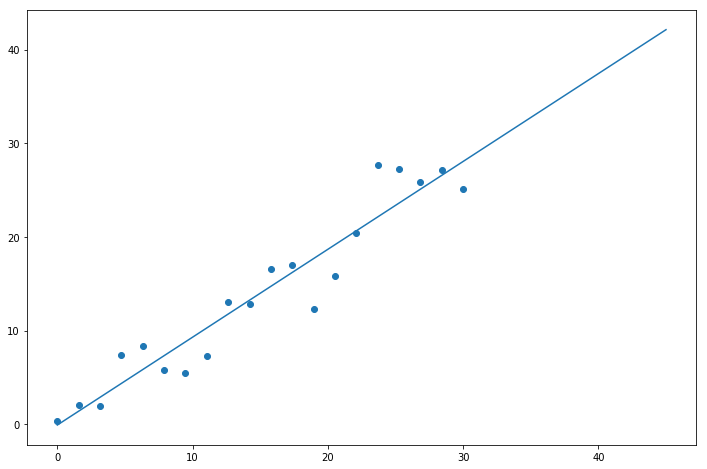

In [38]:
plt.figure(figsize = (12,8))
plt.scatter(X,Y)
x1 = np.linspace(0,45).reshape(-1,1)
plt.plot(x1,model.predict(x1))

1.准备数据
2.初始化模型
3.预测
4.评价

In [55]:
len(X)

20

In [40]:
Y

array([[  0.31379265],
       [  2.07964595],
       [  1.97192528],
       [  7.35978339],
       [  8.38288287],
       [  5.82544881],
       [  5.46888788],
       [  7.23104088],
       [ 13.0111985 ],
       [ 12.88658691],
       [ 16.60465543],
       [ 17.05059666],
       [ 12.30469477],
       [ 15.82858092],
       [ 20.38050701],
       [ 27.68379224],
       [ 27.21880373],
       [ 25.86490102],
       [ 27.12450144],
       [ 25.07514145]])

In [42]:
Y_PRE = model.predict(X)

In [44]:
np.sum(np.square(Y_PRE - Y))

139.33378228652046

In [45]:
model.intercept_

array([-0.08676005])

In [46]:
model.coef_

array([[ 0.93800856]])

In [47]:
Y_PRE2 = (model.coef_ + 0.1)*X + model.intercept_

In [48]:
np.sum(np.square(Y_PRE2 - Y))

200.91272965494139

客观的评价模型

In [56]:
X_train, X_test = X[:15], X[15:]

In [57]:
Y_train, Y_test = Y[:15], Y[15:]

In [58]:
X_train

array([[  0.        ],
       [  1.57894737],
       [  3.15789474],
       [  4.73684211],
       [  6.31578947],
       [  7.89473684],
       [  9.47368421],
       [ 11.05263158],
       [ 12.63157895],
       [ 14.21052632],
       [ 15.78947368],
       [ 17.36842105],
       [ 18.94736842],
       [ 20.52631579],
       [ 22.10526316]])

In [59]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
np.sum(np.square(model.predict(X_test) - Y_test))

113.51022258608569

In [61]:
model.coef_

array([[ 0.81364699]])

In [62]:
model.intercept_

array([ 0.78707481])

In [69]:
Y_PRE3 = model.coef_*X_test + model.intercept_ + 0.5

In [70]:
np.sum(np.square(Y_PRE3 - Y_test))

94.928447122842257

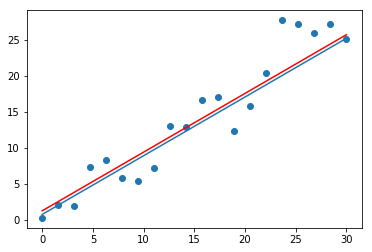

In [68]:
plt.scatter(X,Y)
plt.plot(X,model.predict(X))
plt.plot(X , model.coef_*X + model.intercept_ + 0.5, color = 'r')